In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [15]:
def initial_condition_I(L, dx):
    """
    Make initial condition as sin(2 * pi * x), for x in [0, L]
    """ 
    return np.sin(2 * np.pi * np.arange(0, L, dx))

def initial_condition_II(L, dx):
    """
    Make initial condition as sin(5 * pi * x), for x in [0, L]
    """ 
    return np.sin(5 * np.pi * np.arange(0, L, dx))

def initial_condition_III(L, dx):
    """
    Make initial condition as sin(5 * pi * x), for x in [L / 5, 4L / 5]
    """ 
    N = round(L / dx)

    # Make initial state containing only zeros
    state = np.zeros(N)

    # Change nonzero parts
    state[round(N/5):round(2*N/5)] = np.sin(5 * np.pi * np.arange(0, L, dx))[round(N/5):round(2*N/5)]
    return state

In [16]:
def calculate_amplitude(left, right, center, previous, c, dt, dx):
    """
    Calculate amplitude at single point according to finite difference
    """ 
    return c**2 * dt**2 * (left + right - 2 * center) / dx**2 + 2 * center - previous

In [17]:
def do_timestep(state, previous_state, c, dt, dx, N):
    """
    Do single timestep: iterate over all points in empty solution and fill them in based on previous solution
    """

    # Start with an empty solution containing all zeros
    next_state = np.zeros_like(state)

    # Iterate over discretized points
    for index in range(1, N - 1):

        # Extract states of neighbors
        left = state[index - 1]
        right = state[index + 1]
        center = state[index]
        previous = previous_state[index]

        # Calculate state based on neighbors
        next_state[index] = calculate_amplitude(left, right, center, previous, c, dt, dx)

    return next_state

In [18]:
def do_T_timesteps(initial_condition, c, dt, dx, N, T, store_ts):

    # Calculate accuracy on discretized timesteps based on dt to prevent floating point errors
    t_decimals = round(-1 * np.log10(dt)) + 1

    # List to store states for the plotting
    states_to_keep = []

    # The system starts in a stationary state, so constant in time. Hence, previous state is same as current state
    previous_state = np.copy(initial_condition)

    # Calculate first state
    state = do_timestep(previous_state, previous_state, c, dt, dx, N)

    # Perform desired amount of timesteps, calculating new states based on the previous ones
    for i, t in enumerate(np.arange(0, T, dt)):
        next_state = do_timestep(state, previous_state, c, dt, dx, N)
        previous_state = np.copy(state)
        state = np.copy(next_state)

        # If current time in list of timesteps to save the state, save the state
        if round(t, t_decimals) in store_ts:
            states_to_keep.append(state)
    
    return states_to_keep

In [19]:
def init(line):
    line.set_data([], [])
    return line,

def update(frame, line, states_to_keep):
    data = states_to_keep[frame]
    line.set_data(np.linspace(0, 1, len(data)), data)
    return line,

In [20]:
def run_simulation(T, c, L, dt, dx, initial_condition, store_ts, make_animation=False, filename=None):

    # Calculate amount of discretized x-coordinates
    N = round(L / dx)
    if make_animation:
        
        # Settings for the animation
        framerate=30
        duration=5

        # Calculate total number of frames, timesteps, and which frames to save based on framerate and duration of the animation
        frames = framerate * duration
        timesteps = round(T / dt)
        frequency = round(timesteps / frames)
        t_decimals = round(-1 * np.log10(dt)) + 1

        # Make array of timesteps to store
        store_ts = np.around(np.arange(0, T, dt)[::frequency], t_decimals)

    # Do simulation, and extract the desired frames
    states_to_keep = do_T_timesteps(initial_condition, c, dt, dx, N, T, store_ts)

    if make_animation:
        fig = plt.figure()
        ax = plt.axes(xlim = (0, 1), ylim = (-2, 2))
        line, = ax.plot([], [], lw = 2)

        # Make animation based on stored frames
        ani = animation.FuncAnimation(fig, lambda frame: update(frame, line, states_to_keep), frames=len(states_to_keep), init_func=lambda: init(line), interval=1000/framerate, blit=False)
        if filename:
            ani.save(filename, writer='ffmpeg')
        return

    else:

        # Plot different states of the system
        for index, state in enumerate(states_to_keep):
            plt.plot(np.linspace(0, L, N), state, label=store_ts[index])

        plt.legend()

    if filename:
        plt.savefig(filename)
    else:
        plt.show()

1.0


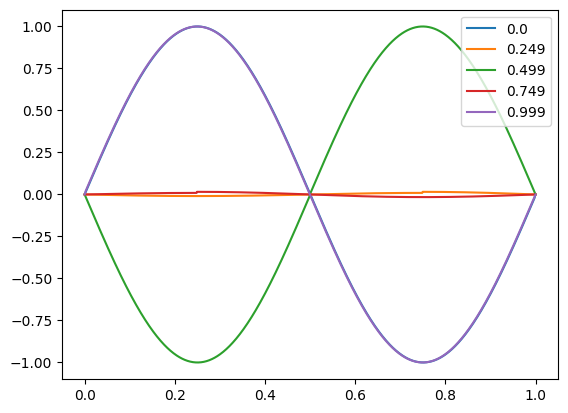

In [21]:
T = 1
c = 1
L = 1
dt = 0.001
dx = 0.001
print(c*dt/dx)
store_ts = np.array([0., 0.249, 0.499, 0.749, 0.999])

initial_condition = initial_condition_I(L, dx)

run_simulation(T, c, L, dt, dx, initial_condition, store_ts)

MovieWriter ffmpeg unavailable; using Pillow instead.


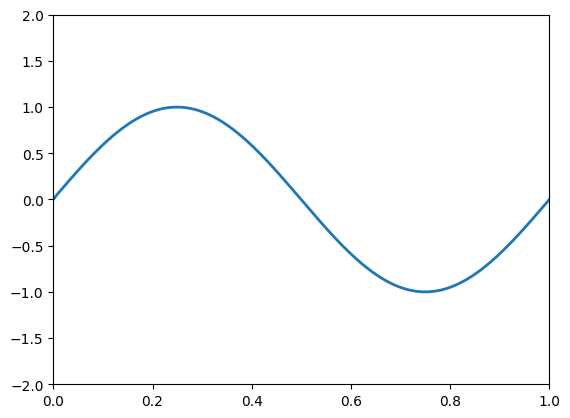

In [22]:
make_animation = True
run_simulation(T, c, L, dt, dx, initial_condition, store_ts, make_animation, filename='animation_I.gif')

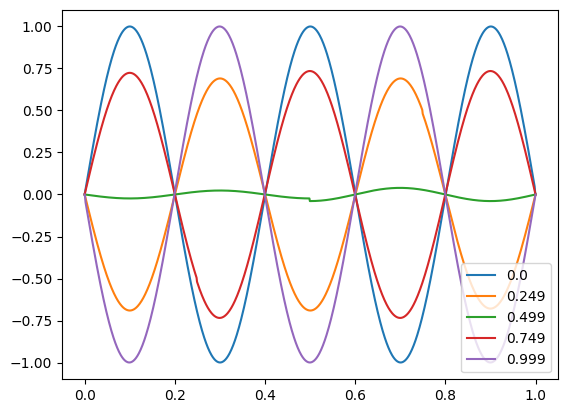

In [23]:
initial_condition = initial_condition_II(L, dt)

run_simulation(T, c, L, dt, dx, initial_condition, store_ts)

MovieWriter ffmpeg unavailable; using Pillow instead.


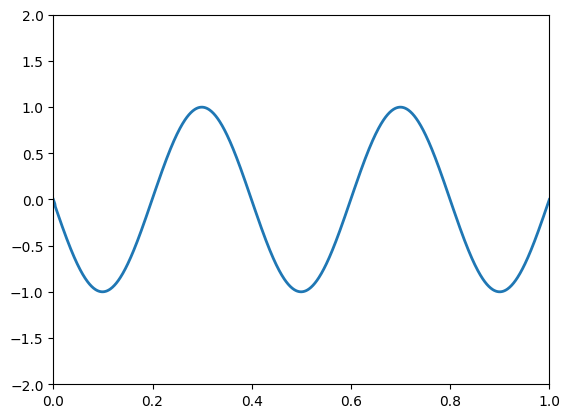

In [24]:
make_animation = True
run_simulation(T, c, L, dt, dx, initial_condition, store_ts, make_animation, filename='animation_II.gif')

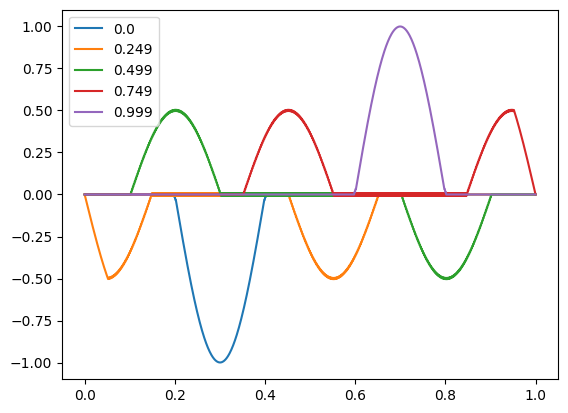

In [27]:

initial_condition = initial_condition_III(L, dx)

run_simulation(T, c, L, dt, dx, initial_condition, store_ts)

MovieWriter ffmpeg unavailable; using Pillow instead.


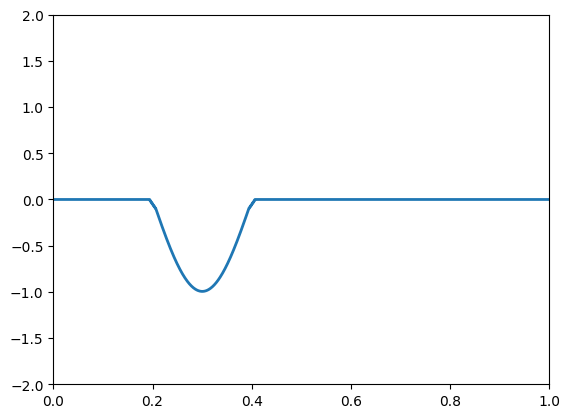

In [28]:
make_animation = True
run_simulation(2 * T, c, L, dt, dx, initial_condition, store_ts, make_animation, filename='animation_III.gif')